
## Method : stream() and astream() as sync and async method

# values:This stream full state of the graph after each node is called
# update: update state of the graph


In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [18]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [19]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"

In [20]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="chatgpt-4o-latest")
llm.invoke("Hello")

AIMessage(content='Hello! 😊 How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'chatgpt-4o-latest', 'system_fingerprint': 'fp_89d721b155', 'id': 'chatcmpl-Cavd9rWfjv5WvAC6QGV9Cs0FBUbsS', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--836514be-4b28-4ef4-b056-78851a8a36ea-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [21]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model_name="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Soumen, and I like to play cricket")

AIMessage(content="<think>\nOkay, the user is Soumen and he mentioned he likes to play cricket. Let me think about how to respond appropriately. First, I should acknowledge his name and his interest. Cricket is a popular sport, so maybe ask about his favorite team or position. I should keep the conversation friendly and open-ended to encourage him to share more. Let me check if there's any recent cricket news or events that might be relevant, but since I don't have real-time data, I'll stick to general questions. Make sure the tone is positive and engaging.\n</think>\n\nHi Soumen! That's awesome that you enjoy playing cricket—it's such a thrilling sport! 🏏 Whether you're batting, bowling, or fielding, every role adds to the fun. Do you have a favorite position to play, or a team you particularly support? I'd love to hear more about your cricket experiences! 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 185, 'prompt_tokens': 20, 'total_tokens': 205, '

In [22]:
from  langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def superbot(state:State):
    return {"messages":[llm_groq.invoke(state["messages"])]}

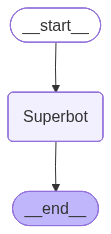

In [23]:
from IPython.display import Image,display

graph = StateGraph(State)

graph.add_node("Superbot",superbot)
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile(checkpointer=memory)

display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [27]:
## Invocation

config = {"configurable": {"thread_id": "3"}}
graph_builder.invoke({"messages": ["Hi My anme is Soumen and I like Cricket"]}, config=config)

{'messages': [HumanMessage(content='Hi My anme is Soumen and I like Cricket', additional_kwargs={}, response_metadata={}, id='6acbdd6a-52cb-4b89-8bbd-d068a28e146f'),
  AIMessage(content='<think>\nOkay, the user introduced themselves as Soumen and mentioned they like cricket. I should acknowledge their introduction and express interest in their hobby. I need to keep the response friendly and engaging. Maybe ask them about their favorite team or a memorable cricket moment. Also, make sure to correct any typos they might have, like "My anme is Soumen" should be "My name is Soumen." Let\'s keep the conversation open for further interaction.\n</think>\n\nHi Soumen! Nice to meet you. 🏏 Cricket is an awesome sport—do you follow any particular team or player closely? I\'d love to hear about your favorite moments or what draws you to the game! (No worries about the typo in your message—I\'m here to chat, not to judge! 😊)', additional_kwargs={}, response_metadata={'token_usage': {'completion_tok

In [29]:
# Create Thread
config = {"configurable": {"thread_id": "2"}}
for chunk in graph_builder.stream({"messages": ["Hi My name is Soumen and I like Cricket"]}, config=config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user mentioned their name is Soumen and they like cricket. The first time, I greeted them and asked about how they got into cricket. Now, they're repeating the same message. Maybe they didn't see my previous response or just want to restate their introduction. I should acknowledge their message again but maybe add a bit more to keep the conversation going. Let me check the history to avoid repeating the same questions. Since I asked about how they got into cricket and whether they play or watch, maybe I can now ask about their favorite team or a memorable match they've seen. That way, I can gather more info and keep the dialogue engaging. Also, maybe mention something about current cricket events if I know any to connect with their interests. Need to keep the tone friendly and encouraging.\n</think>\n\nHello again, Soumen! 😊 I'm excited to connect again. Since you love cricket, let's dive deeper—do you have a favorite tea

In [30]:
for chunk in graph_builder.stream({"messages": ["Hi My name is Soumen and I like Cricket"]}, config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi My anme is Soumen and I like Cricket', additional_kwargs={}, response_metadata={}, id='d01d52b6-0759-4478-8179-a5a8937fc1b6'), AIMessage(content='<think>\nOkay, the user mentioned their name is Soumen and they like cricket. First, I should correct the typo in their name, maybe they meant "My name is Soumen" instead of "My anme is Soumen." Then, since they like cricket, I should ask how they got into the sport. I need to make sure to acknowledge their interest positively. Maybe they play the game, follow a team, or just enjoy watching matches. I should also consider if there\'s anything specific about cricket they enjoy—like a particular format (Test, ODI, T20) or players they admire. I should keep the response friendly and open-ended to encourage them to share more. Also, check if there\'s any cultural context, like they might be from a cricket-loving country. I should avoid making assumptions but provide a welcoming environment for them to elabor

In [31]:
for chunk in graph_builder.stream({"messages": ["I also like football"]}, config=config,stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, let's see. The user has mentioned their name is Soumen, likes cricket, and now also likes football. The assistant has been greeting them each time with different prompts about cricket. Now, with the new info about football, I need to respond in a way that acknowledges both interests.\n\nFirst, I should make sure to welcome Soumen again, maybe with a friendly emoji. Then, connect their love for cricket and football. Maybe ask how they balance both or which one they prefer. Also, ask about favorite teams or players in football. It's good to keep the conversation engaging by asking open-ended questions. Need to keep the tone positive and enthusiastic. Let me check previous responses to maintain consistency. The assistant has been using emojis, so I should include some here too. Maybe a football emoji and a cricket bat. Also, ensure the response is not too long but still inviting. Alright, time to draft that.\n</think>\n\nHello S

In [34]:
for chunk in graph_builder.stream({"messages": ["I love sports"]}, config=config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi My anme is Soumen and I like Cricket', additional_kwargs={}, response_metadata={}, id='d01d52b6-0759-4478-8179-a5a8937fc1b6'), AIMessage(content='<think>\nOkay, the user mentioned their name is Soumen and they like cricket. First, I should correct the typo in their name, maybe they meant "My name is Soumen" instead of "My anme is Soumen." Then, since they like cricket, I should ask how they got into the sport. I need to make sure to acknowledge their interest positively. Maybe they play the game, follow a team, or just enjoy watching matches. I should also consider if there\'s anything specific about cricket they enjoy—like a particular format (Test, ODI, T20) or players they admire. I should keep the response friendly and open-ended to encourage them to share more. Also, check if there\'s any cultural context, like they might be from a cricket-loving country. I should avoid making assumptions but provide a welcoming environment for them to elabor

Streaming the data with astream method

In [ ]:

config = {"configurable": {"thread_id": "5"}}
async for event in graph_builder.astream_events




({"messages": ["Hi My name is Soumen and I like Cricket"]}, config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Soumen and I like Cricket']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '1617cec5-36dc-40a1-bad1-ce6b2d99c522', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi My name is Soumen and I like Cricket', additional_kwargs={}, response_metadata={}, id='33a33d83-30b3-4452-938c-5080cc95f593'), AIMessage(content="<think>\nOkay, the user introduced himself as Soumen and mentioned he likes cricket. I need to respond in a friendly way. Let me start by greeting him and acknowledging his interest in cricket. Maybe ask him which team he supports or if he plays. Keep it conversational and open-ended so he can share more. Also, make sure to use proper punctuation and keep the tone positive. Let me check for any grammar issues. Alright, that should work.\n</think>\n\nHi Soumen! Nice to meet you 😊 Cricket is an amazing sport - do you follow an